# Análise exploratória de dados

In [2]:
import pandas as pd
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/data.csv")
dictionary = pd.read_csv("../data/external/dictionary.csv")

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## 1. Descrição dos dados

O **Diabetes prediction dataset** é uma coleção de dados médicos e demográficos de pacientes, juntamente com seu status de diabetes. Retirado do Kaggle, os dados incluem características como `idade`, `sexo`, `índice de massa corporal (IMC)`, `hipertensão`, `doença cardíaca`, `histórico de tabagismo`, `nível de HbA1c` e `nível de glicose no sangue`. Os dados podem ser úteis para profissionais de saúde na identificação de pacientes que podem estar em risco de desenvolver diabetes e no desenvolvimento de planos de tratamento personalizados. O conjunto de dados conta com 100000 linhas e 9 variáveis.

### Dicionário de Dados

In [5]:
dictionary

,variavel,descricao,tipo,subtipo
0,gender,Gênero do individuo,qualitativa,nominal
1,age,Idade do individuo,quantitativa,continua
2,hypertension,Individuo apresenta hipertensão,quantitativa,discreta
3,heart_disease,Individuo apresenta doença cardiaca,quantitativa,discreta
4,smoking_history,Historico de tabagismo,qualitativa,nominal
5,bmi,IMC do individuo,quantitativa,continua
6,HbA1c_level,Nivel da hemoglobina A1c,quantitativa,continua
7,blood_glucose_level,Nivel de glicose no sangue,quantitativa,continua
8,diabetes,Individuo apresenta diabetes,quantitativa,discreta


In [8]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [9]:
df.count()

gender                 100000
age                    100000
hypertension           100000
heart_disease          100000
smoking_history        100000
bmi                    100000
HbA1c_level            100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

- O dataset tem 100.000 linhas

### Dados Faltantes

In [11]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

- Não há dados faltantes no dataset

---

### Verificando linhas duplicadas:

In [12]:
df.duplicated().sum()

3854

### Removendo linhas duplicadas:

In [15]:
df = df.drop_duplicates()

---

In [17]:
df.describe(include="all")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146,96146.000000,96146.000000,96146.000000,96146,96146.000000,96146.000000,96146.000000,96146.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,never,NaN,NaN,NaN,NaN
freq,56161,NaN,NaN,NaN,34398,NaN,NaN,NaN,NaN
mean,NaN,41.794326,0.077601,0.040803,NaN,27.321461,5.532609,138.218231,0.088220
std,NaN,22.462948,0.267544,0.197833,NaN,6.767716,1.073232,40.909771,0.283616
min,NaN,0.080000,0.000000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.000000,0.000000,NaN,23.400000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.000000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,59.000000,0.000000,0.000000,NaN,29.860000,6.200000,159.000000,0.000000


- Mais mulheres estão presentes nos dados
- Pessoas que não tem histórico de tabagismo estão mais presentes nos dados
- O índice médio de massa corporal (BMI) é de 27.3, caracterizado como sobrepeso.
- O nível médio de hemoglobina A1c no sangue é de 5.5, aproximadamente.
- O nível médio de glicose no sangue é de 138.2, aproximadamente.

## 2. Perguntas de partida e hipóteses

- Existe uma diferença significativa no nível médio de glicose no sangue entre pessoas com e sem diabetes?
- O histórico de tabagismo está associado a um maior risco de diabetes?
- Existe relação entre idade e prevalência de diabetes?
- Como o índice de massa corporal (BMI) varia entre diferentes grupos de gênero e diagnóstico de diabetes?
- Problemas cardíacos como doenças e hipertensão tem maior índice de diabetes ?

## 3. Insights

### Existe uma diferença significativa no nível médio de glicose no sangue entre pessoas com e sem diabetes?

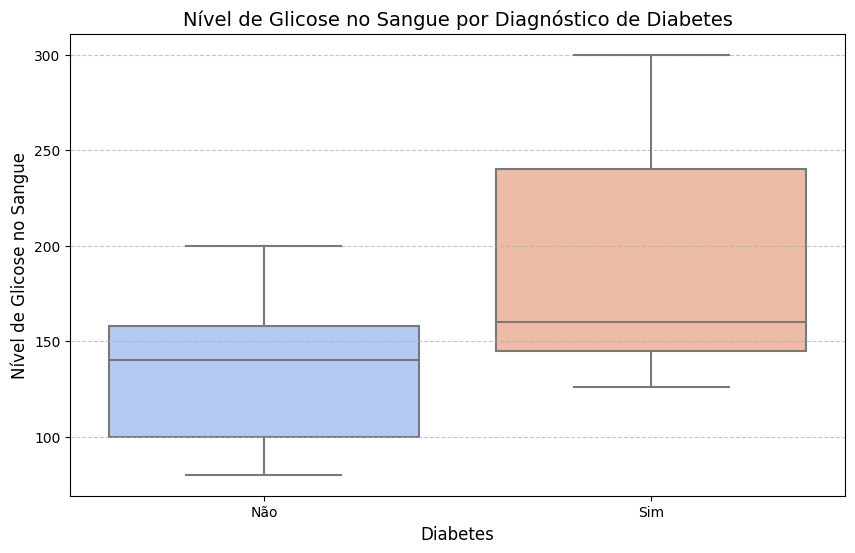

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', palette="coolwarm")
plt.title('Nível de Glicose no Sangue por Diagnóstico de Diabetes', fontsize=14)
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Nível de Glicose no Sangue', fontsize=12)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

O gráfico de caixas mostra que pessoas com diabetes têm níveis de glicose no sangue significativamente mais altos em comparação com aquelas sem diabetes. A mediana do grupo com diabetes está bem acima da mediana do grupo sem diabetes, e a distribuição dos valores também é mais ampla. 
- Altos níveis de glicose no sangue são um marcador claro para diabetes, como esperado. 
- Há uma sobreposição entre os grupos, indicando que algumas pessoas sem diabetes também podem ter níveis elevados de glicose.

---

### O histórico de tabagismo está associado a um maior risco de diabetes?

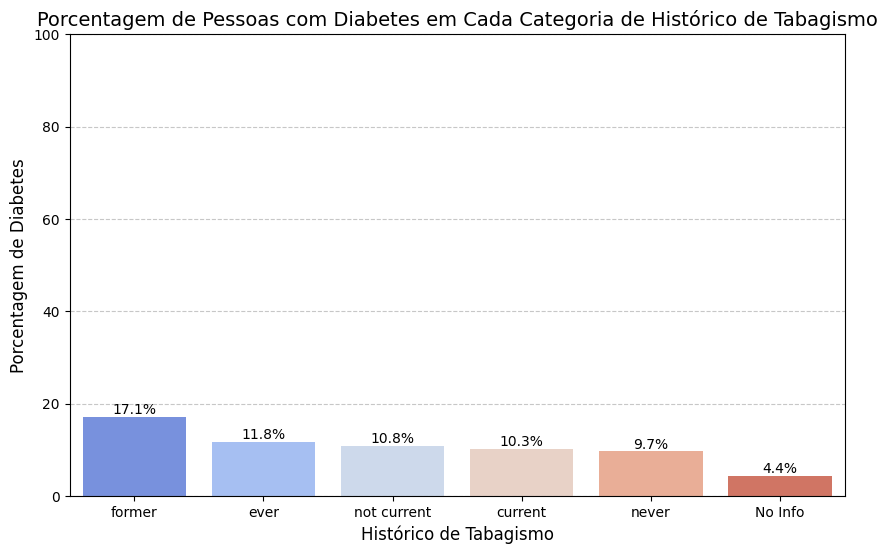

In [78]:
smoking_diabetes = (
    df[df['diabetes'] == 1]
    .groupby('smoking_history')
    .size()
    / df.groupby('smoking_history').size() * 100
).reset_index(name='percentage')

smoking_diabetes = smoking_diabetes.sort_values(by='percentage', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=smoking_diabetes, x='smoking_history', y='percentage', palette='coolwarm')
plt.title('Porcentagem de Pessoas com Diabetes em Cada Categoria de Histórico de Tabagismo', fontsize=14)
plt.xlabel('Histórico de Tabagismo', fontsize=12)
plt.ylabel('Porcentagem de Diabetes', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        fontsize=10, 
        color='black', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.show()

1. Maior prevalência de diabetes entre ex-fumantes:
    - A categoria de "ex-fumantes" mostra a maior porcentagem de pessoas com diabetes.
    - Fumar pode ser um fator de risco para o desenvolvimento de diabetes tipo 2, ou os ex-fumantes podem estar em maior risco devido a danos causados ao longo dos anos de tabagismo.
2. Fumantes atuais têm porcentagem de diabetes parecida com os que nunca fumaram:
    - Fumantes atuais podem estar em um estágio inicial da doença, ou talvez os efeitos do tabagismo sobre o diabetes ainda não se manifestaram completamente.
    - A presença de diabetes entre os não-fumantes pode indicar outros fatores de risco, como genética, alimentação inadequada, ou falta de atividade física.

---

### Existe relação entre idade e prevalência de diabetes?

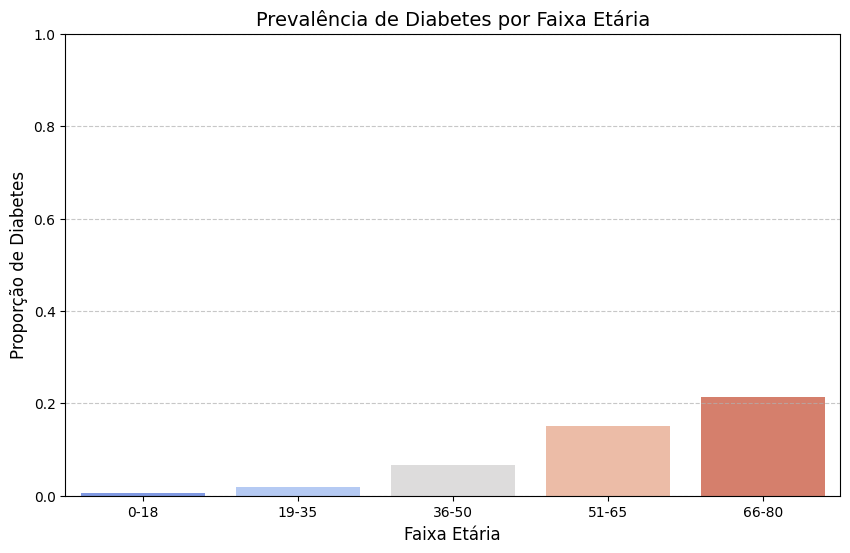

In [82]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 80], 
                           labels=['0-18', '19-35', '36-50', '51-65', '66-80'])

age_diabetes = df.groupby('age_group')['diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=age_diabetes, x='age_group', y='diabetes', palette='coolwarm')
plt.title('Prevalência de Diabetes por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Proporção de Diabetes', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Como esperado, quanto mais velho é o indivíduo, mais provável é a presença de diabetes. Isso porque a causa da diabetes tipo 2 está diretamente relacionado ao sobrepeso, sedentarismo, hipertensão, etc. Logo, sendo essas as causas mais comumente encontradas em idosos, a tendência é o desenvolvimento acentuado da diabetes por parte dessa faixa etária.

---

### Como o índice de massa corporal (BMI) varia entre diferentes grupos de gênero e diagnóstico de diabetes?

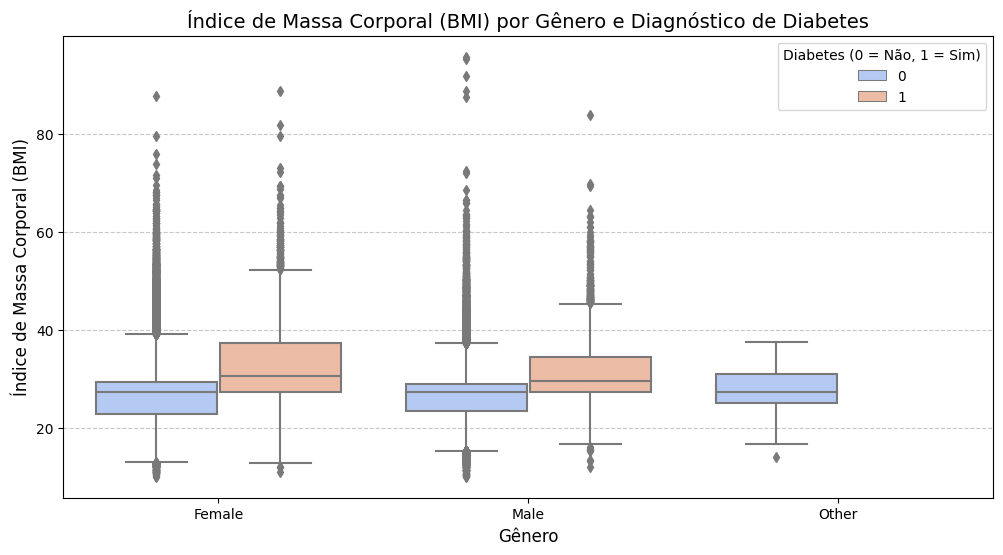

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='gender', y='bmi', hue='diabetes', palette='coolwarm')
plt.title('Índice de Massa Corporal (BMI) por Gênero e Diagnóstico de Diabetes', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Índice de Massa Corporal (BMI)', fontsize=12)
plt.legend(title='Diabetes (0 = Não, 1 = Sim)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Apesar do elevado nível de outliers nos gráficos, podemos notar que a mediana das pessoas com diabetes é maior do que as que não apresentam a doença. Como esperado, confirma uma das causas diretas para o desenvolvimento da diabetes. Um maior índice de massa corporal indica sobrepeso ou obesidade, que geralmente é acompanhado por sedentarismo, sendo essas as causas comuns em pessoas com diagnóstico de diabetes positivo.

---

### Problemas cardíacos como doenças e hipertensão tem maior índice de diabetes ?

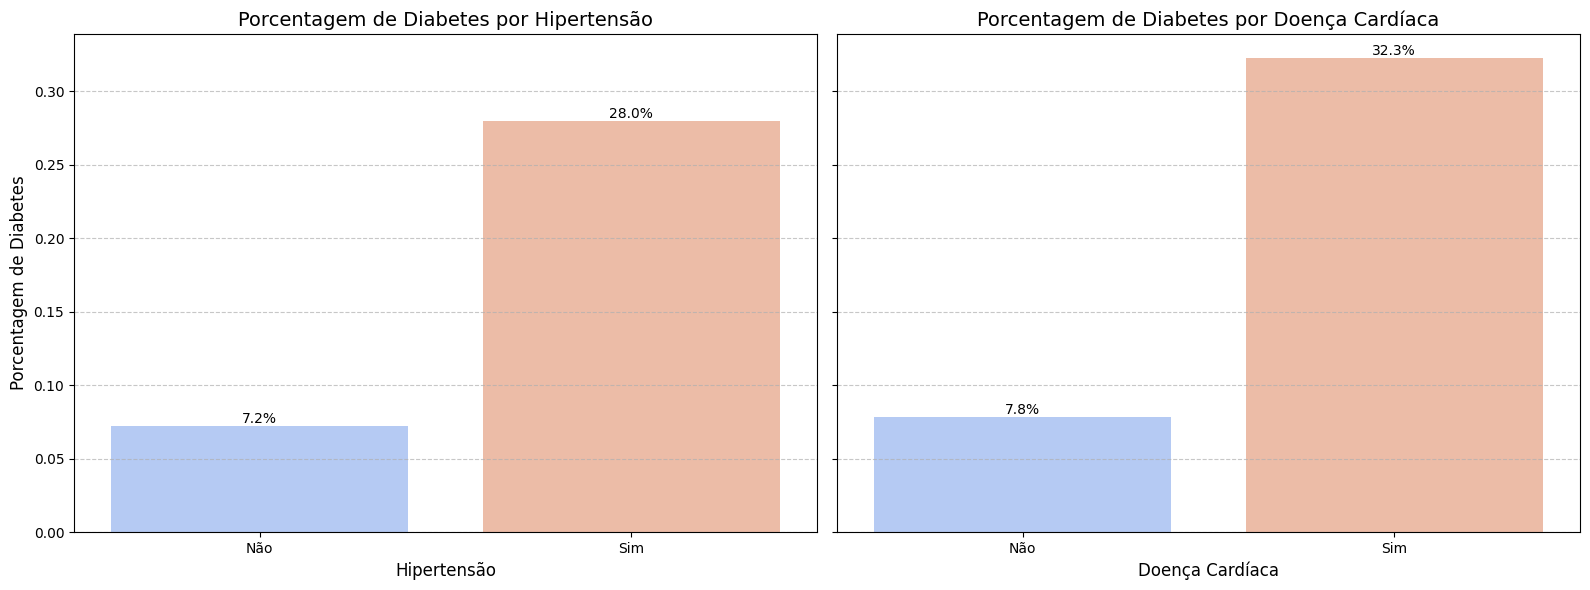

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

hypertension_diabetes = (
    df.groupby('hypertension')['diabetes']
    .mean()
    .reset_index()
    .replace({0: 'Não', 1: 'Sim'})
)
sns.barplot(
    data=hypertension_diabetes,
    x='hypertension',
    y='diabetes',
    ax=axes[0],
    palette='coolwarm'
)
axes[0].set_title('Porcentagem de Diabetes por Hipertensão', fontsize=14)
axes[0].set_xlabel('Hipertensão', fontsize=12)
axes[0].set_ylabel('Porcentagem de Diabetes', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for p in axes[0].patches:
    axes[0].annotate(
        f'{p.get_height() * 100:.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        fontsize=10, 
        color='black', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

heart_disease_diabetes = (
    df.groupby('heart_disease')['diabetes']
    .mean()
    .reset_index()
    .replace({0: 'Não', 1: 'Sim'})
)
sns.barplot(
    data=heart_disease_diabetes,
    x='heart_disease',
    y='diabetes',
    ax=axes[1],
    palette='coolwarm'
)
axes[1].set_title('Porcentagem de Diabetes por Doença Cardíaca', fontsize=14)
axes[1].set_xlabel('Doença Cardíaca', fontsize=12)
axes[1].set_ylabel('')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for p in axes[1].patches:
    axes[1].annotate(
        f'{p.get_height() * 100:.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        fontsize=10, 
        color='black', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

Como é possível notar, há um nível signficativamente maior de diabéticos nos grupos de hipertensão e doenças cardíacas.
- Há uma forte sobreposição entre doença cardíaca e diabetes, sugerindo que ambas podem compartilhar fatores de risco comuns, como obesidade e sedentarismo.
- Ambas as condições (hipertensão e doença cardíaca) são marcadores importantes que podem prever ou indicar risco de diabetes.

---

### Salvamento de dados e dicionário

In [84]:
df.to_csv("../data/processed/data.csv", index=False)
dictionary.to_csv("../data/external/new_dictionary.csv", index=False)